# AI Fall 2022 - A4 - Decision Tree
## Your info

**Student Name:** Mehrad Milanloo

**Student Id:** 99105775

## Practical Question - Decision Tree (25 + 5 points)
In this question you will first write a program to find an appropriate order of features for training a decision tree based on information gain. In the second part, you will use existing implementations to train and tune a classifier using GridSearch on the given dataset. And try to finish this in <15 mins.

### Import
Import the libraries you need in the next cell.

In [20]:
import pandas as pd
import numpy as np
import itertools
# ...

### Part A (20 points)
Consider the following dataframe and answer the following questions:

In [21]:
df = pd.DataFrame({
    'Race': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Sex': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
    'Age': [43.0, 72.0, 4.0, 59.0, 34.0, 55.0, 41.0, 39.0, 6.0, 77.0, 67.0, 35.0, 45.0, 39.0, 32.0, 57.0, 99.0, 68.0, 47.0, 28.0],
    'BMI': [25.803, 33.394, 20.278, 32.918, 30.743, 37.734, 23.725, 20.722, 19.452, 22.044, 17.481, 18.918, 28.578, 19.214, 23.562, 23.446, 21.872, 20.691, 25.471, 25.82],
    'Smoker': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    'Label': [False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False],
})

df.head()

,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,43.0,25.803,1.0,False
1,2.0,2.0,72.0,33.394,0.0,True
2,1.0,2.0,4.0,20.278,1.0,False
3,1.0,2.0,59.0,32.918,0.0,False
4,1.0,2.0,34.0,30.743,1.0,False


#### QA.1 (10 points)
Complete the following function that calculates and returns the list of features based on their information gain.

In [22]:
def feature_order(X_data, y_data):
    '''
    Calculate the best feature order
    for training a decision tree based on
    information gain.
    Input:
        X_data (pd.DataFrame) contains data features
        y_data (pd.Series) contains the labels
    Output:
        order (list[str]): The `X_data` columns in the correct order
    '''
    order = list(pd.DataFrame(X_data).columns)
    IG = []
    for i in range(len(order)):
      IG.append(information_gain(y_data, X_data[order[i]] < max_information_gain_split(X_data[order[i]], y_data)))
    order = [x for _,x in sorted(zip(IG,order), reverse=True)]

    # Your code here
    return order

def entropy(y_data):
    '''
    Calculate the entropy for a given set of labels.
    Input:
        y_data (pd.Series) contains the labels
    Output:
        H (float): The entropy
    '''
    entropy = 0
    if isinstance(y_data, pd.Series):
        a = y_data.value_counts()/y_data.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)

def conditional_entropy(X_data, y_data):
    '''
    Calculate the conditional entropy for a given feature.
    Input:
        X_data (pd.Series) contains the feature data
        y_data (pd.Series) contains the labels
    Output:
        H (float): The conditional entropy
    '''
    H = 0
    for i in range(len(X_data)):
        H += X_data[i] * entropy(y_data)
    return H

def information_gain(y, mask, func=entropy):
  '''
  It returns the Information Gain of a variable given a loss function.
  y: target variable.
  mask: split choice.
  func: function to be used to calculate Information Gain in case os classification.
  '''
  a = sum(mask)
  b = mask.shape[0] - a
  if(a == 0 or b ==0): 
    ig = 0
  else:
      ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  return ig

def max_information_gain_split(x, y, func=entropy):
  '''
  Given a predictor & target variable, returns the best split, the error and the type of variable based on a selected cost function.
  x: predictor variable as Pandas Series.
  y: target variable as Pandas Series.
  func: function to be used to calculate the best split.
  '''
  max_ig = 0 
  options = x.sort_values().unique()[1:]
  best_split = None
  for val in options:
    mask = x < val
    val_ig = information_gain(y, mask, func)
    if val_ig > max_ig:
      max_ig = val_ig
      best_split = val
  return best_split

print(feature_order(df.iloc[:, :-1], df.Label))

['Age', 'BMI', 'Race', 'Smoker', 'Sex']


#### QA.2 (5 points)
What are some of the effective approaches to prevent the tree from overfitting? (three approaches)

<font color=#183364>
    <i>
        Answer.
        <ol>
            <li>Using Pre-Prune techniques, e.g. max_depth, min_samples_leaf, min_samples_split</li>
            <li>Using Post-Prune techniques; Build the full tree and then prune it.</li>
            <li>Creating Random Forest</li>
        </ol>
    </i>
</font>

#### QA.3 (5 points)
About the `Age` feature which is an integer-valued input attribute, how can a tree utilize it for classification? Write a small piece of code to find the answer for this specific column.

<font color=#183364>
    <i>
        Answer. 
        The idea is to find a pivot number from the specified column. Then we'll split the tree based on which row has a number in the column more or less than the pivot number. The main key is how we're going to find the pivot. Easily we run a for loop on every unique value in the column, temporarely split the tree based on that value as the pivot number. Then we calculate IG for each situation and finally choose the number which leads to the maximum IG.
    </i>
</font>

In [23]:
def max_information_gain_split(x, y, func=entropy):
  '''
  Given a predictor & target variable, returns the best split, the error and the type of variable based on a selected cost function.
  x: predictor variable as Pandas Series.
  y: target variable as Pandas Series.
  func: function to be used to calculate the best split.
  '''
  max_ig = 0
  # d = pd.DataFrame(x).columns
  # display(d)
  options = x.sort_values().unique()[1:]
  best_split = None
  for val in options:

    mask = x < val
    val_ig = information_gain(y, mask, func)
    if val_ig > max_ig:
      max_ig = val_ig
      best_split = val
  return best_split

# print(max_information_gain_split(df.iloc[:, :-1], df.Label))

### Part B (10 points)
In this part you will learn more about [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and use it to train a classifier and tune its parameters.

#### QB.1 (5 points)
For measuring the _accuracy_ of your models, choose a subset of the given dataset as your validation set (Check out [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [38]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.Label, test_size=0.2)

In [39]:
# Your code here
## Set your own hyperparameters below, such as:
dt_hyperparams = {
    'min_samples_split': 2,
    'criterion': 'entropy',
    'max_depth': 3,
    'min_samples_leaf': 1,
    'max_leaf_nodes': 4,
    'random_state': 13
}
clf = tree.DecisionTreeClassifier(**dt_hyperparams)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_hat))
## Train the model and check its performance


Accuracy:  1.0


#### QB.2 (5 points)
Take a look at customizable and potentially useful input params of the model, define a range for each of their values, and use GridSearch (Feel free to implement/[import](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) it) and find a set of hyperparametetrs that work best among your candidates.

In [31]:
# Your code here
param_grid = {'min_samples_split': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3], 'max_leaf_nodes': [2, 3, 4], 'random_state': [1, 2, 3, 4, 5]}
param_grid = list(ParameterGrid(param_grid))
best_acc = 0
best_param = None
for param in param_grid:
    clf = tree.DecisionTreeClassifier(**param)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    if acc > best_acc:
        best_acc = acc
        best_param = param
print('Best accuracy: ', best_acc)
print('Best parameters: ', best_param)

Best accuracy:  0.9
Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 2}


#### QB.3 (5 extra points)
Visualize the tree splits and interpret it (Hint: Search about `IPython.display.Image`, `pydotplus`, `StringIO`, and `export_graphviz`).

In [27]:
!pip install graphviz
!pip install pydotplus


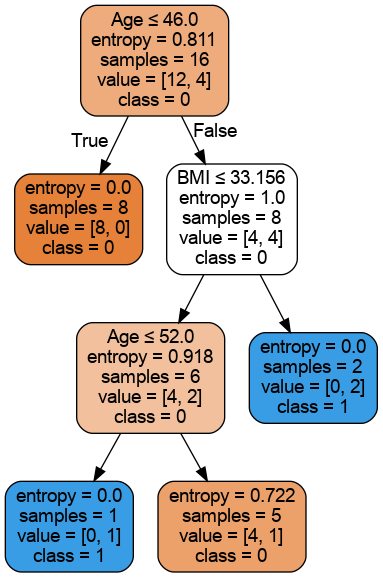

In [40]:
import graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
tree.export_graphviz(clf, out_file='tree.dot', feature_names=df.columns[:-1], label='all', class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())
